<a href="https://colab.research.google.com/github/vishalpanchamia/Reasoning-LLMs-from-Scratch/blob/main/09_Comparing_TD(0)_and_Monte_Carlo_methods_for_Random_Walk_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

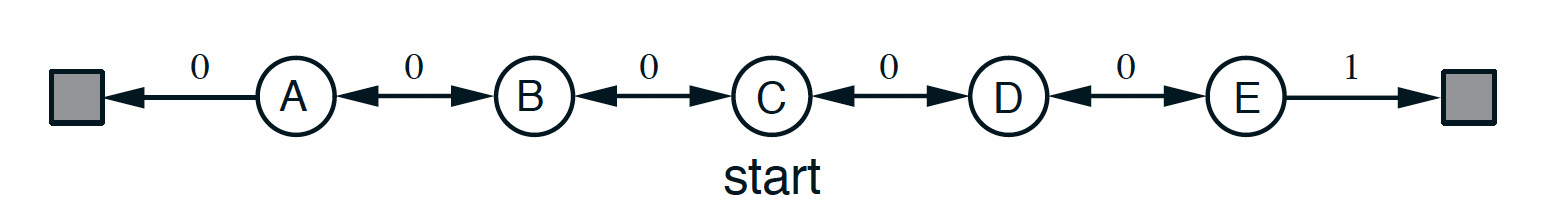

* Step 1: Setup and Environment


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states: A (0) to E (4), with terminal states at -1 (left) and +1 (right)
num_states = 5
states = np.arange(1, num_states + 1)  # states B to F (mapped to 1-5)
start_state = 3  # C is the center, index 3
terminal_left = 0
terminal_right = num_states + 1

def true_value():
    """True values for states A-E, with 0 and 1 at ends"""
    return np.linspace(1/6, 5/6, num_states)


* Step 2: Generate an Episode

In [ ]:
def generate_episode():
    state = start_state
    episode = []
    while True:
        if state == terminal_left:
            return episode, 0
        if state == terminal_right:
            return episode, 1
        next_state = state + np.random.choice([-1, 1])
        episode.append(state)
        state = next_state


* Step 3: TD(0) Learning


In [ ]:
def td_0(alpha, episodes=100):
    V = np.zeros(num_states + 2)
    for _ in range(episodes):
        state = start_state
        while state != terminal_left and state != terminal_right:
            next_state = state + np.random.choice([-1, 1])
            reward = 1 if next_state == terminal_right else 0
            V[state] += alpha * (reward + V[next_state] - V[state])
            state = next_state
    return V[1:-1]  # exclude terminal states


* Step 4: Constant-α Monte Carlo

In [ ]:
def mc_constant_alpha(alpha, episodes=100):
    V = np.zeros(num_states + 2)
    for _ in range(episodes):
        episode, reward = generate_episode()
        for state in episode:
            V[state] += alpha * (reward - V[state])
    return V[1:-1]  # exclude terminal states


* Step 5: Evaluate Error Over Time

In [ ]:
def rms_error(V, true_V):
    return np.sqrt(np.mean((V - true_V) ** 2))

alphas = [0.05, 0.1, 0.15]
episodes_list = [10, 20, 50, 100, 200, 500]
true_V = true_value()

td_errors = {alpha: [] for alpha in alphas}
mc_errors = {alpha: [] for alpha in alphas}

for alpha in alphas:
    for episodes in episodes_list:
        td_V = td_0(alpha, episodes)
        mc_V = mc_constant_alpha(alpha, episodes)
        td_errors[alpha].append(rms_error(td_V, true_V))
        mc_errors[alpha].append(rms_error(mc_V, true_V))


* Plot the Results (Estimated Values vs True Values for both methods)

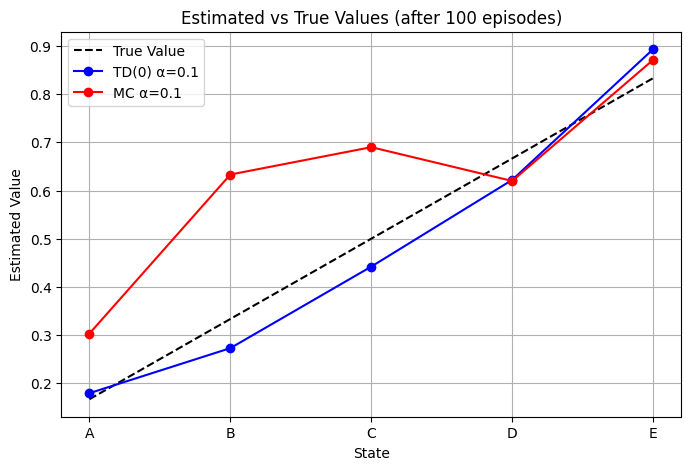

In [ ]:
# Choose one alpha and episode count to visualize
alpha = 0.1
episodes = 100

# Estimate values using TD(0) and MC
td_estimates = td_0(alpha=alpha, episodes=episodes)
mc_estimates = mc_constant_alpha(alpha=alpha, episodes=episodes)

# True values
true_V = true_value()

# Labels for states A to E
labels = ['A', 'B', 'C', 'D', 'E']
x = np.arange(len(labels))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, true_V, 'k--', label='True Value')
plt.plot(x, td_estimates, 'bo-', label=f'TD(0) α={alpha}')
plt.plot(x, mc_estimates, 'ro-', label=f'MC α={alpha}')
plt.xticks(x, labels)
plt.xlabel('State')
plt.ylabel('Estimated Value')
plt.title(f'Estimated vs True Values (after {episodes} episodes)')
plt.legend()
plt.grid(True)
plt.show()


* Step 7: Plot the Results (Check which method converges faster)


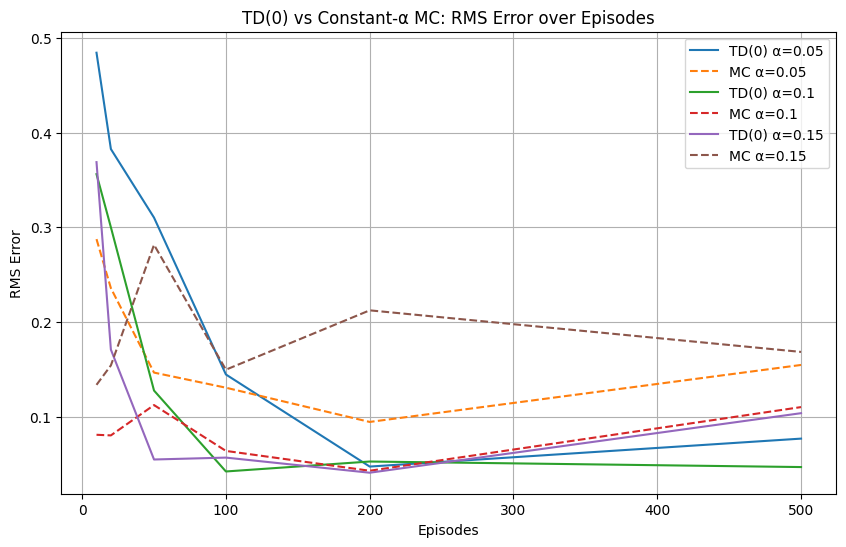

In [ ]:
plt.figure(figsize=(10, 6))
for alpha in alphas:
    plt.plot(episodes_list, td_errors[alpha], label=f'TD(0) α={alpha}')
    plt.plot(episodes_list, mc_errors[alpha], '--', label=f'MC α={alpha}')

plt.xlabel('Episodes')
plt.ylabel('RMS Error')
plt.title('TD(0) vs Constant-α MC: RMS Error over Episodes')
plt.legend()
plt.grid(True)
plt.show()
